In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Generate some data and plot them

In [2]:
## Generate some data and plot them
X_val = np.random.uniform(-4.0, 4.0, size=(100,1))
Y_val = 5.7 * X_val**3 - 3.25 * X_val**2 + 10 * X_val + np.random.normal(scale=40, size=(100,1))

In [3]:
def plot_points(X_, Y_):
    xx = np.linspace(-4, 4, 100)
    yy =  5.7 * xx**3 - 3.25 * xx**2 + 10 * xx
    plt.scatter(X_val , Y_val)
    plt.plot(xx, yy, color='red')

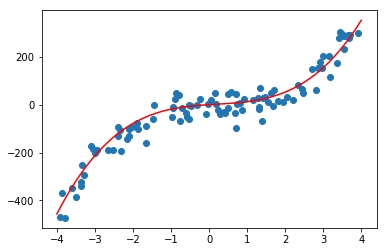

In [4]:
plot_points(X_val, Y_val)

# Building the model

Assume a linear model

$$ \hat{y} = a \cdot x + b  $$

Training objective to find $a$, and $b$ that minmize the loss value $MSE$.
$$ MSE  = \frac{1}{N} \sum_{i=1}^{N} {(y_i - \hat{y}_i)^2}$$

# Build the graph 

In [5]:
x = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='x')
w = tf.Variable(initial_value=tf.truncated_normal(shape=[]), name='w')
b = tf.Variable(initial_value=0.0, name='b')
y_ = w * x + b

Instructions for updating:
Use `tf.global_variables_initializer` instead.


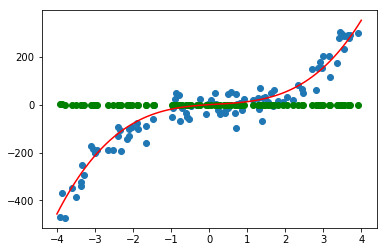

In [6]:
with tf.Session() as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    y_pred = session.run(y_, feed_dict={x: X_val})
    plot_points(X_val, Y_val)
    plt.scatter(X_val , y_pred, color='green')



## Define a cost value

In [7]:
y = tf.placeholder(tf.float32, shape=[None, 1])
cost = tf.reduce_mean(tf.squared_difference(y, y_))

## Define optimizer

In [8]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate=0.003)
train_op = minimizer.minimize(cost)

## Run the train op

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step 1 - loss = 27108.818359.
Step 2 - loss = 25835.437500.
Step 3 - loss = 24635.585938.
Step 4 - loss = 23504.996094.
Step 5 - loss = 22439.650391.
Step 6 - loss = 21435.765625.
Step 7 - loss = 20489.773438.
Step 8 - loss = 19598.320312.
Step 9 - loss = 18758.244141.
Step 10 - loss = 17966.560547.
Step 11 - loss = 17220.466797.
Step 12 - loss = 16517.320312.
Step 13 - loss = 15854.629883.
Step 14 - loss = 15230.049805.
Step 15 - loss = 14641.369141.
Step 16 - loss = 14086.513672.
Step 17 - loss = 13563.517578.
Step 18 - loss = 13070.537109.
Step 19 - loss = 12605.832031.
Step 20 - loss = 12167.765625.
Step 21 - loss = 11754.791992.
Step 22 - loss = 11365.459961.
Step 23 - loss = 10998.400391.
Step 24 - loss = 10652.326172.
Step 25 - loss = 10326.017578.
Step 26 - loss = 10018.333008.
Step 27 - loss = 9728.195312.
Step 28 - loss = 9454.587891.
Step 29 - loss = 9196.554688.
Step 30 - loss = 8953.196289.
Step 31 -

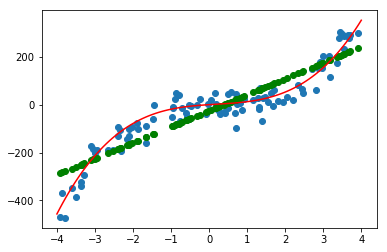

In [9]:
n_steps = 700
with tf.Session() as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    for step_idx in range(n_steps):
        cur_loss, _ = session.run([cost, train_op], feed_dict={x: X_val, y: Y_val})
        print('Step %d - loss = %f.' %(step_idx+1, cur_loss))
        #y_pred = session.run(y_, feed_dict={x: X_val})
        
    y_pred = session.run(y_, feed_dict={x: X_val})
    plot_points(X_val, Y_val)
    plt.scatter(X_val , y_pred, color='green')
    ## 
    w_ , b_ = session.run([w, b])
    print('Final weights and bias ( %f, %f) ' %(w_, b_))

In [10]:
writer = tf.summary.FileWriter('.', tf.get_default_graph())
writer.close()

## We need a more felixible model

** Going to add hidden layer **

In [14]:
graph2 = tf.Graph()
n_hidden = 64
with graph2.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 1])
    y = tf.placeholder(tf.float32, shape=[None, 1])
    
    ## Note w now becomes a matrix 
    w1 = tf.Variable(initial_value=tf.truncated_normal(shape=[1, n_hidden]), name='w1')
    b1 = tf.Variable(initial_value=tf.zeros(shape=[n_hidden]), name='b1')
    
    layer1 = tf.matmul(x, w1) + b1
    layer1_out = tf.nn.sigmoid(layer1)
    
    w2 = tf.Variable(initial_value=tf.truncated_normal(shape=[n_hidden, 1], name='w2'))
    b2 = tf.Variable(initial_value=tf.zeros(shape=[1]), name='b2')
    y_ = tf.matmul(layer1_out, w2) + b2
    
    cost = tf.reduce_mean(tf.squared_difference(y, y_))
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    train_op = optimizer.minimize(cost)
    
    

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step 1 - loss = 27167.339844.
Step 2 - loss = 22306.978516.
Step 3 - loss = 18806.847656.
Step 4 - loss = 15953.631836.
Step 5 - loss = 13897.505859.
Step 6 - loss = 12490.056641.
Step 7 - loss = 11490.742188.
Step 8 - loss = 10717.822266.
Step 9 - loss = 10089.159180.
Step 10 - loss = 9572.496094.
Step 11 - loss = 9146.414062.
Step 12 - loss = 8791.973633.
Step 13 - loss = 8495.199219.
Step 14 - loss = 8239.915039.
Step 15 - loss = 8016.838867.
Step 16 - loss = 7821.375977.
Step 17 - loss = 7657.611328.
Step 18 - loss = 7563.431152.
Step 19 - loss = 8144.900879.
Step 20 - loss = 12607.324219.
Step 21 - loss = 8952.218750.
Step 22 - loss = 8416.245117.
Step 23 - loss = 9062.246094.
Step 24 - loss = 11333.121094.
Step 25 - loss = 14338.224609.
Step 26 - loss = 12348.699219.
Step 27 - loss = 12919.787109.
Step 28 - loss = 12268.701172.
Step 29 - loss = 10911.282227.
Step 30 - loss = 10058.972656.
Step 31 - loss = 9

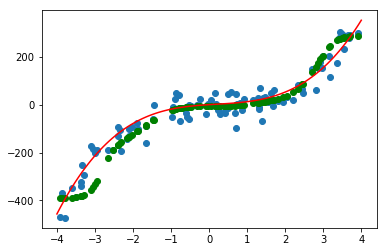

In [15]:
n_steps = 500
with tf.Session(graph=graph2) as session:
    init_op = tf.initialize_all_variables()
    session.run(init_op)
    for step_idx in range(n_steps):
        cur_loss, _ = session.run([cost, train_op], feed_dict={x: X_val, y: Y_val})
        print('Step %d - loss = %f.' %(step_idx+1, cur_loss))
        #y_pred = session.run(y_, feed_dict={x: X_val})
        
    y_pred = session.run(y_, feed_dict={x: X_val})
    plot_points(X_val, Y_val)
    plt.scatter(X_val , y_pred, color='green')